In [3]:
# making imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
# check if gpu is available
torch.cuda.is_available()

True

# step1: define the model architecture

In [37]:
# use torch.nn module to define a model with 
# 1) two convolutional layers with output channel 16, 32 each with kernel 3 and stride 1
# 2) relu activation after each convolutional layer
# 3) max pooling with kernel 2
# 4) a dropout layer with rate 10%
# 5) a flattern layer
# 6) a dense layer with 64 neurons
# 7) a relu activation
# 8) a drop out layer with rate 25%
# 9) a dense layer with 10 neurons
# 10) use softmax activation

class myConv(nn.Module):
    def __init__(self):
        super().__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1) # can we choose what features?
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.do1 = nn.Dropout2d(0.1)
        self.do2 = nn.Dropout(0.25)
        self.lf1 = nn.Linear(4608, 64) # have to calculate the input size by hand?
        self.lf2 = nn.Linear(64,10)
    
    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.do1(x)
        x = torch.flatten(x,1) # not flatten the batch channel?
        x = self.lf1(x)
        x = F.relu(x)
        x = self.do2(x)
        x = self.lf2(x)
        op = F.log_softmax(x,1) # have to exclude last channel for all functions?
        return op              # don't need to specify the number of output classes?


        


## define the training and testing routine

In [57]:
#
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad() # set gradients to 0
        pred_prob = model(X) # output probabilities for each class?
        loss = F.nll_loss(pred_prob, y)
        loss.backward() # compute gradient
        optim.step() # upedate weights
        if b_i % 10 == 0:
            print('epoch: {} [{}/{} ({:.0f}%)]\t training loss: {:.6f}'.format(
                    epoch, b_i * len(X), len(train_dataloader.dataset),
                    100. * b_i / len(train_dataloader), loss.item()))

In [60]:
def test(model, device, test_dataloader):
    model.eval() # for making inference?
    loss = 0
    success = 0
    with torch.no_grad(): # not calculating gradients
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            loss += F.nll_loss(pred_prob, y, reduction="sum").item() # reduction='sum'?
            pred = pred_prob.argmax(dim=1, keepdim=True)
            success += pred.eq(y.view_as(pred)).sum().item()
            loss /= len(test_dataloader.dataset)
            print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(
                loss, success, len(test_dataloader.dataset),
                100. * success / len(test_dataloader.dataset)))

## training

In [40]:
train_dataloader = torch.utils.data.DataLoader(
                    datasets.MNIST('W://Study Material/Jupyter Notebook/Small Projects/MNIST - PyTorch',
                                      train=True,transform=transforms.Compose([
                                          transforms.ToTensor(), transforms.Normalize((0.1302,),
                                                                                     (0.3069,))
                                      ])), batch_size=32, shuffle=True)

In [41]:
test_dataloader = torch.utils.data.DataLoader(
                    datasets.MNIST('W://Study Material/Jupyter Notebook/Small Projects/MNIST - PyTorch',
                                      train=False,transform=transforms.Compose([
                                          transforms.ToTensor(), transforms.Normalize((0.1302,),
                                                                                     (0.3069,))
                                      ])), batch_size=500, shuffle=False)

In [62]:
torch.manual_seed(0)
device = torch.device("cuda:0")
model = myConv()
model.cuda()
optimizer = optim.Adadelta(model.parameters(),lr=0.1)

In [63]:
for epoch in range(1,2):
    train(model, device, train_dataloader,optimizer,epoch)
    test(model,device,test_dataloader)

epoch: 1 [0/60000 (0%)]	 training loss: 2.320377
epoch: 1 [320/60000 (1%)]	 training loss: 2.232965
epoch: 1 [640/60000 (1%)]	 training loss: 1.910860
epoch: 1 [960/60000 (2%)]	 training loss: 1.584494
epoch: 1 [1280/60000 (2%)]	 training loss: 1.081735
epoch: 1 [1600/60000 (3%)]	 training loss: 1.003600
epoch: 1 [1920/60000 (3%)]	 training loss: 0.881128
epoch: 1 [2240/60000 (4%)]	 training loss: 0.769732
epoch: 1 [2560/60000 (4%)]	 training loss: 0.975686
epoch: 1 [2880/60000 (5%)]	 training loss: 0.612269
epoch: 1 [3200/60000 (5%)]	 training loss: 0.612677
epoch: 1 [3520/60000 (6%)]	 training loss: 0.752664
epoch: 1 [3840/60000 (6%)]	 training loss: 0.515795
epoch: 1 [4160/60000 (7%)]	 training loss: 0.829541
epoch: 1 [4480/60000 (7%)]	 training loss: 0.593325
epoch: 1 [4800/60000 (8%)]	 training loss: 0.706249
epoch: 1 [5120/60000 (9%)]	 training loss: 0.415628
epoch: 1 [5440/60000 (9%)]	 training loss: 0.516252
epoch: 1 [5760/60000 (10%)]	 training loss: 0.264734
epoch: 1 [6080/60

epoch: 1 [48960/60000 (82%)]	 training loss: 0.149566
epoch: 1 [49280/60000 (82%)]	 training loss: 0.310765
epoch: 1 [49600/60000 (83%)]	 training loss: 0.044413
epoch: 1 [49920/60000 (83%)]	 training loss: 0.087606
epoch: 1 [50240/60000 (84%)]	 training loss: 0.146554
epoch: 1 [50560/60000 (84%)]	 training loss: 0.019678
epoch: 1 [50880/60000 (85%)]	 training loss: 0.017864
epoch: 1 [51200/60000 (85%)]	 training loss: 0.300845
epoch: 1 [51520/60000 (86%)]	 training loss: 0.064873
epoch: 1 [51840/60000 (86%)]	 training loss: 0.026559
epoch: 1 [52160/60000 (87%)]	 training loss: 0.039999
epoch: 1 [52480/60000 (87%)]	 training loss: 0.020557
epoch: 1 [52800/60000 (88%)]	 training loss: 0.157173
epoch: 1 [53120/60000 (89%)]	 training loss: 0.092729
epoch: 1 [53440/60000 (89%)]	 training loss: 0.144155
epoch: 1 [53760/60000 (90%)]	 training loss: 0.106605
epoch: 1 [54080/60000 (90%)]	 training loss: 0.069951
epoch: 1 [54400/60000 (91%)]	 training loss: 0.178140
epoch: 1 [54720/60000 (91%)]

# inference

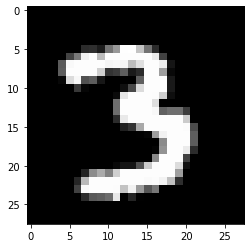

In [71]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)
b_i, (sample_data, sample_targets) = next(test_samples)
plt.imshow(sample_data[0][0],cmap='gray',interpolation='none')


In [72]:
sample_data = sample_data.to("cuda")
print(f"Model prediction is: {model(sample_data).data.max(1)[1][0]}")

Model prediction is: 3
